<a href="https://colab.research.google.com/github/RafikaSaadouni/CNN-LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Etablir une connexion avec google Drive  pour Charger dataset**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import**

In [15]:
#la bibliothèque pandas pour lire la format csv de dataset
import pandas as pd


In [16]:
from operator import imatmul
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
from sklearn import metrics
from keras.utils import np_utils
import numpy as np
from sklearn.preprocessing import  MinMaxScaler

from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer




In [17]:
#les noms des colonne de dataset
featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]
#la colonne flag qui contient des valeur string
flagV=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

#la colonne protocol_type qui contient des valeur string
protocol_typeV=['tcp','udp','icmp']
#la colonne service qui contient des valeur string
serviceV=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']
# les étiquète 
binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}  

**Télechargement de dataset****

In [18]:
data_train=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTrain+.txt', names=featureV)
data_test=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest+.txt' , names=featureV)
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [19]:
data_train = data_train.query("service != 'aol'")
data_train = data_train.query("service != 'harvest'")
data_train = data_train.query("service != 'http_2784'")
data_train = data_train.query("service != 'http_8001'")
data_train = data_train.query("service != 'red_i'")
data_train = data_train.query("service != 'urh_i'")
data_train = data_train.query("service != 'printer'")
data_train = data_train.query("service != 'rje'")
#-------------------------------------------------------------------------------->>>>
data_test = data_test.query("service != 'printer'")
data_test = data_test.query("service != 'rje'")



**Numérisation  et normalisation**

In [20]:


def preprocessing(data,cls,df):
  data['label']=data['label'].replace(['normal.','normal'],0)
  #----------------------classification binaire---------------------
  if cls=='binary':
    for i in range(len(binary_attack)):
      data['label'] = data['label'].replace(binary_attack[i], 1)
      #----------------------fractionnement des labels--------------------- 
  y=data['label']
  x=data.loc[:,'duration':'hot']
  # copie la colunne du protocole dans tompon
  t=x.protocol_type.copy()
  #convertir en binaire
  t=pd.get_dummies(t)
  #supprimer tout la colunne de protocole_type
  x=x.drop(columns='protocol_type',axis=1)
  #ajouter la colonne
  x=x.join(t)
# copie la colonne du service dans tompon
  t1=x.service.copy()
   #convertir en binaire
  t1=pd.get_dummies(t1)
  #supprimer tout la colunne de service
  x=x.drop(columns='service',axis=1)
   #ajouter la colonne
  x=x.join(t1)
# copie la colonne du service dans tompon
  t2=x.flag.copy()
  #convertir en binaire
  t2=pd.get_dummies(t2)
   #supprimer tout la colunne de flag
  x=x.drop(columns='flag',axis=1)
  #ajouter la colonne
  x=x.join(t2)
  #copie label dans yt
  yt=y.copy()
  #convertir en binaire
  yt=pd.get_dummies(yt)
  x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
  return x,yt
  

In [21]:
#Exécution de la fontion précédente
x_train,y_train=preprocessing(data_train,cls='binary',df='train')
x_test,y_test=preprocessing(data_test,cls='binary',df='test')

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(125793, 83, 1)

In [23]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(22525, 83, 1)

**Définition de modèle**

In [24]:

model = Sequential()
# coche d'entrée avec 51 neurons
model.add(LSTM(units=51, return_sequences=True, activation='relu', input_shape=(x_train.shape[1],1)))
#couche cachée avec  51 neurons
model.add(Dense(units=51,activation='relu'))
model.add(Dense(51))
#redimensionner 
model.add(Flatten())
model.add(Dropout(0.1))
# couche de sortie avec la fonction d'activation sigmoid 
model.add(Dense(2, activation='sigmoid'))

**Résumé de modèle**

In [25]:
# afficher une résumé de model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 83, 51)            10812     
                                                                 
 dense_3 (Dense)             (None, 83, 51)            2652      
                                                                 
 dense_4 (Dense)             (None, 83, 51)            2652      
                                                                 
 flatten_1 (Flatten)         (None, 4233)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4233)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 8468      
                                                                 
Total params: 24,584
Trainable params: 24,584
Non-trai

In [26]:
from tensorflow import keras

# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',keras.metrics.Precision()])

# training the model on training dataset
model.fit(x_train, y_train, epochs=10, batch_size=1000,validation_data=(x_test,y_test))


Epoch 1/10
126/126 [==============================] - 32s 238ms/step - loss: 0.3246 - accuracy: 0.8467 - precision_1: 0.8451 - val_loss: 0.5075 - val_accuracy: 0.8158 - val_precision_1: 0.8155
Epoch 2/10
126/126 [==============================] - 30s 237ms/step - loss: 0.1386 - accuracy: 0.9570 - precision_1: 0.9570 - val_loss: 0.5724 - val_accuracy: 0.7816 - val_precision_1: 0.7816
Epoch 3/10
126/126 [==============================] - 29s 228ms/step - loss: 0.1312 - accuracy: 0.9593 - precision_1: 0.9593 - val_loss: 0.5593 - val_accuracy: 0.7822 - val_precision_1: 0.7822
Epoch 4/10
126/126 [==============================] - 29s 227ms/step - loss: 0.1271 - accuracy: 0.9606 - precision_1: 0.9605 - val_loss: 0.6219 - val_accuracy: 0.7557 - val_precision_1: 0.7558
Epoch 5/10
126/126 [==============================] - 29s 233ms/step - loss: 0.1251 - accuracy: 0.9606 - precision_1: 0.9605 - val_loss: 0.5668 - val_accuracy: 0.7831 - val_precision_1: 0.7831
Epoch 6/10
126/126 [===============

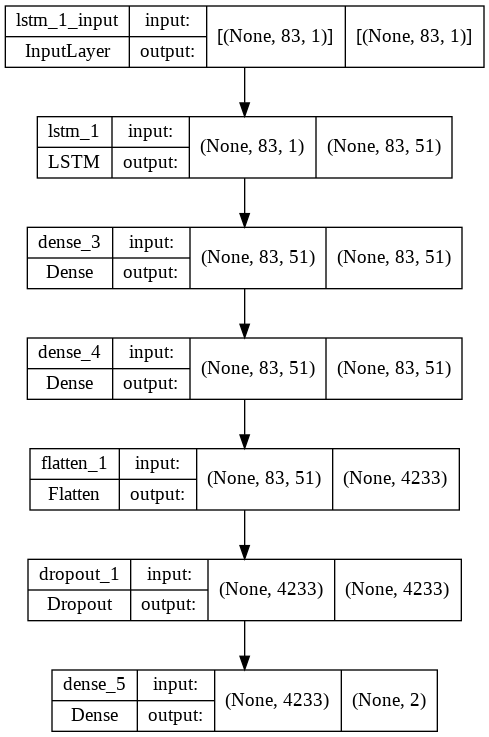

In [27]:
keras.utils.plot_model(model, 'modele_LSTM.png', show_shapes=True)